# This notebook goes through the options for clinopyroxene-Liquid thermobarometry and clinopyroxene-only thermobarometry
- Cpx-Liq matching is not covered in this tutorial, there is a separate folder "Cpx_Liquid_melt_matching" for that 

## First, load the necessary python things

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..") # This allows you to put the python file in the folder above. So you can have lots of sub folders
import matplotlib.pyplot as plt
import Thermobar as pt

## Now, load the data 

In [2]:
out=pt.import_excel('Cpx_Liq_Example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

# Working out options for thermometers/barometers
- At any point, you can do help(pt.function) to get some more information

## For example, here we get information on inputs/outputs for Cpx-Liq thermometry, including the equation options

In [3]:
help(pt.calculate_cpx_liq_temp)

Help on function calculate_cpx_liq_temp in module Thermobar.clinopyroxene_thermobarometry:

calculate_cpx_liq_temp(*, equationT, cpx_comps=None, liq_comps=None, meltmatch=None, P=None, eq_tests=False, H2O_Liq=None, Fe3Fet_Liq=None, sigma=1, KdErr=0.03)
     Clinopyroxene-Liquid thermometry, calculates temperature in Kelvin
     (and equilibrium tests as an option)
    
    Parameters
     -------
     cpx_comps: DataFrame
         Clinopyroxene compositions with column headings SiO2_Cpx, MgO_Cpx etc.
    
     liq_comps: DataFrame
         Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
     Or:
    
     meltmatch: DataFrame
         Combined dataframe of cpx-Liquid compositions
         Used for calculate_cpx_liq_press_temp_matching function.
    
     EquationT: str
         Choice of equation:
         Cpx-Liquid
         |  T_Put1996_eqT1  (P-indep, H2O-indep)
         |  T_Mas2013_eqTalk1  (P-indep, H2O-indep, alk adaption of T1)
         |  T_Brug2019  (P-indep, 

# Example calculation 1 - temperature for a known pressure and water content
- Here, we calculate temperature using the H2O content given in the H2O_Liq column (the default), and P=5 kbar
- There are a number of equations, but here we use T_Put2008_eq33 for temperature

In [4]:
Temp_T33=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Put2008_eq33", P=5)
Temp_T33

0    1364.712867
1    1304.755285
2    1272.453442
3    1305.686881
4    1252.876983
dtype: float64

## Or we can overwrite the water content in the function using an integer
- Here, we are reseting water to 0

In [5]:
Temp_T33_0H2O=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Put2008_eq33", P=5, H2O_Liq=0)
Temp_T33_0H2O

0    1416.119951
1    1383.073744
2    1346.831511
3    1384.120579
4    1324.919286
dtype: float64

## Next, lets use the equation of Brugman and Till, 2019. 
- This returns a number of warnings, because the authors recomend a compositional calibration range

In [6]:
Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Brug2019", P=5)
Temp_TBrug

Youve selected a P-independent function


<ipython-input-6-b4de49978884>:1: UserWarning: Some inputted CPX compositions have Cpx Mg#>0.65;.
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Brug2019", P=5)
<ipython-input-6-b4de49978884>:1: UserWarning: Some inputted CPX compositions have Al2O3>7 wt%;.
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Brug2019", P=5)
<ipython-input-6-b4de49978884>:1: UserWarning: Some inputted Liq compositions have  SiO2<70 wt%;
  Temp_TBrug=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Brug2019", P=5)
../..\Thermobar\clinopyroxene_thermobarometry.py:566: UserWarning: which is outside the recomended calibration range of Brugman and Till (2019)
  w.warn("which is outside the recomended calibration range of Brugman and Till (2019)")


0    2070.839417
1    1905.832392
2    1475.513348
3    1831.506437
4    1302.097694
dtype: float64

## We can also specify eq_tests=True to get a full dataframe back with all the components, as well as a number of equilibrium test values

In [7]:
Temp_T33_0H2O_EqTests=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationT="T_Put2008_eq33", P=5, H2O_Liq=0, eq_tests=True)
Temp_T33_0H2O_EqTests

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs,Delta_CaTs,Delta_DiHd,SiO2_Liq,TiO2_Liq,...,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,Kd_Ideal_Put,Kd_Ideal_Masotta,DiHd_Pred_Mollo,EnFs_Pred_Mollo,CaTs_Pred_P1999,CrCaTS_Pred_P1999
0,5,1416.119951,N,0.042816,0.094027,0.010858,0.016957,0.089424,51.1,0.93,...,0.266105,0.549218,0.549218,0.042020,0.266900,0.130058,0.725012,0.092969,0.013418,0.0
1,5,1383.073744,N,0.036792,0.090778,0.007575,0.023796,0.104285,51.5,1.19,...,0.261704,0.505036,0.505036,0.039226,0.259270,0.131700,0.715654,0.089645,0.013021,0.0
2,5,1346.831511,N,0.058659,0.172858,0.043395,0.075254,0.006413,59.1,0.54,...,0.254450,0.526025,0.526025,0.054951,0.250742,0.136544,0.739083,0.142940,0.016630,0.0
3,5,1384.120579,N,0.034331,0.101144,0.012488,0.031526,0.084045,52.5,0.98,...,0.263544,0.525239,0.525239,0.038360,0.259514,0.124040,0.712004,0.102108,0.014301,0.0
4,5,1324.919286,N,0.022156,0.097447,0.021106,0.032121,0.071950,56.2,0.34,...,0.253684,0.438875,0.438875,0.030335,0.245505,0.125902,0.734744,0.085546,0.010990,0.0


# Example calculation 2 - Calculating pressure for a known temperature
- Here, T=1300 K

In [8]:
Temp_PNeave=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Neave2017", T=1300)
Temp_PNeave

0    0.634602
1    1.655874
2    1.146083
3    1.028349
4    3.854147
dtype: float64

## Can do the same as before, overwrite water, ask for equilibrium tests. Using equation 30 from Putirka (2008) this time
- Here, setting H2O=0 wt%, Temp = 1300 K

In [9]:
Temp_P30_0H2O=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", T=1300, H2O_Liq=0, eq_tests=True)
Temp_P30_0H2O

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs,Delta_CaTs,Delta_DiHd,SiO2_Liq,TiO2_Liq,...,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,Kd_Ideal_Put,Kd_Ideal_Masotta,DiHd_Pred_Mollo,EnFs_Pred_Mollo,CaTs_Pred_P1999,CrCaTS_Pred_P1999
0,-2.090909,1300,N,0.015390,0.116829,0.002696,0.019173,0.089851,51.1,0.93,...,0.266105,0.549218,0.549218,0.042020,0.239475,0.107256,0.904287,0.101131,0.011202,0.0
1,-2.604072,1300,Y,0.016996,0.108121,0.006605,0.025431,0.049622,51.5,1.19,...,0.261704,0.505036,0.505036,0.039226,0.239475,0.114358,0.869560,0.103825,0.011385,0.0
2,-2.145841,1300,N,0.069927,0.183575,0.074576,0.076260,0.125978,59.1,0.54,...,0.254450,0.526025,0.526025,0.054951,0.239475,0.125827,0.858649,0.174121,0.015625,0.0
3,-2.334004,1300,N,0.014291,0.117657,0.003134,0.033245,0.066274,52.5,0.98,...,0.263544,0.525239,0.525239,0.038360,0.239475,0.107526,0.862323,0.117730,0.012582,0.0
4,-0.177987,1300,N,0.016126,0.102892,0.007476,0.032562,0.004383,56.2,0.34,...,0.253684,0.438875,0.438875,0.030335,0.239475,0.120457,0.811076,0.099176,0.010549,0.0


## Can also specify a different Fe3Fet_Liq ratio, as delta Kd is calculated using just Fe2+ in the melt
- Note, it is debated whether Kd Fe-Mg should be calculated with all Fe (to do that here, specify Fe3Fet_Liq), or using just Fe2+ (e.g., Neave and Putirka, 2017)
- you can compare the delta Kd Put 2008 in this option from the answers above 

In [10]:
Temp_P30_0H2O_30Fe=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", T=1300, H2O_Liq=0, Fe3Fet_Liq=0.3, eq_tests=True)
Temp_P30_0H2O_30Fe

,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs,Delta_CaTs,Delta_DiHd,SiO2_Liq,TiO2_Liq,...,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,Kd_Ideal_Put,Kd_Ideal_Masotta,DiHd_Pred_Mollo,EnFs_Pred_Mollo,CaTs_Pred_P1999,CrCaTS_Pred_P1999
0,-2.090909,1300,N,0.080646,0.212865,0.002696,0.019173,0.089851,51.1,0.93,...,0.266105,0.549218,0.635106,0.054016,0.239475,0.107256,0.904287,0.101131,0.011202,0.0
1,-2.604072,1300,N,0.078351,0.203468,0.006605,0.025431,0.049622,51.5,1.19,...,0.261704,0.505036,0.593105,0.056122,0.239475,0.114358,0.869560,0.103825,0.011385,0.0
2,-2.145841,1300,N,0.202528,0.316176,0.074576,0.076260,0.125978,59.1,0.54,...,0.254450,0.526025,0.613220,0.187552,0.239475,0.125827,0.858649,0.174121,0.015625,0.0
3,-2.334004,1300,N,0.082216,0.214165,0.003134,0.033245,0.066274,52.5,0.98,...,0.263544,0.525239,0.612473,0.058147,0.239475,0.107526,0.862323,0.117730,0.012582,0.0
4,-0.177987,1300,N,0.079595,0.198613,0.007476,0.032562,0.004383,56.2,0.34,...,0.253684,0.438875,0.527708,0.065386,0.239475,0.120457,0.811076,0.099176,0.010549,0.0


# Example calculation 3 - Iterating pressure and temperature
- In reality, unles you are an experimentalist, you rarely know one of pressure or temperature
- In Keith Putirka's spreadsheets, you can link up columns to iterate P and T towards a solution, this can be done here using the function calculate_cpx_liq_press_temp

## Here, we iterate equation 30 from Putirka (2008) for P, and equation 33 from Putirka (2008) for temperature
- Without specifying anything else, you get a dataframe with columns for calculated pressure and temperature

In [11]:
PT_iter_30_31=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", equationT="T_Put2008_eq33")
PT_iter_30_31

,P_kbar_calc,T_K_calc
0,2.530914,1352.408784
1,1.786845,1290.151507
2,1.171520,1255.933868
3,2.143416,1292.669093
4,2.763538,1243.469600


#### Again, you can also request equilibrium test results

In [12]:
PT_iter_30_31_EqTests=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", eq_tests=True)
PT_iter_30_31_EqTests

Using Fe3FeT from input file to calculate Kd Fe-Mg


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs,Delta_CaTs,Delta_DiHd,SiO2_Liq,TiO2_Liq,...,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,Kd_Ideal_Put,Kd_Ideal_Masotta,DiHd_Pred_Mollo,EnFs_Pred_Mollo,CaTs_Pred_P1999,CrCaTS_Pred_P1999
0,2.530914,1352.408784,Y,0.027981,0.106599,0.011304,0.018174,0.014780,51.1,0.93,...,0.266105,0.549218,0.549218,0.042020,0.252066,0.117485,0.799657,0.092523,0.012201,0.0
1,1.786845,1290.151507,Y,0.014591,0.110154,0.009917,0.025619,0.009195,51.5,1.19,...,0.261704,0.505036,0.505036,0.039226,0.237070,0.112324,0.829134,0.087303,0.011198,0.0
2,1.171520,1255.933868,N,0.080784,0.193537,0.046615,0.077199,0.134845,59.1,0.54,...,0.254450,0.526025,0.526025,0.054951,0.228618,0.115865,0.867516,0.146160,0.014686,0.0
3,2.143416,1292.669093,N,0.012502,0.119081,0.015465,0.033388,0.022622,52.5,0.98,...,0.263544,0.525239,0.525239,0.038360,0.237686,0.106102,0.818671,0.099130,0.012439,0.0
4,2.763538,1243.469600,N,0.002154,0.115101,0.025085,0.033542,0.029538,56.2,0.34,...,0.253684,0.438875,0.438875,0.030335,0.225503,0.108248,0.836231,0.081567,0.009568,0.0


# Cpx-only thermobarometry
- Very similar to above, just don't need liq_comps input

## E.g., calculating pressure using equation 32b 
- This equation requires H2O content in the liquid. If you don't enter anything, it assumes H2O=0
- else specify using H2O_Liq=....

In [13]:
eq32b_noH=pt.calculate_cpx_only_press(cpx_comps=Cpxs, T=1300,
       equationP="P_Put2008_eq32b")
eq32b_noH

0   -1.567381
1   -1.202221
2   -0.317946
3   -0.996608
4    0.467437
dtype: float64

In [14]:
eq32b_5H=pt.calculate_cpx_only_press(cpx_comps=Cpxs, T=1300,
       equationP="P_Put2008_eq32b", H2O_Liq=5)
eq32b_5H

0    0.697619
1    1.062779
2    1.947054
3    1.268392
4    2.732437
dtype: float64

## Calculating temperature using eq 32d at 5 kbar

In [15]:
eq32d_5kbar=pt.calculate_cpx_only_temp(cpx_comps=Cpxs, equationT="T_Put2008_eq32d",
         P=5)
eq32d_5kbar

0    1457.849197
1    1441.107847
2    1415.899813
3    1455.722443
4    1441.512524
dtype: float64

## Iterating P from 32b, and T from 32d, with H2O=5

In [16]:
eq32b_32d_5H=pt.calculate_cpx_only_press_temp(cpx_comps=Cpxs, equationT="T_Put2008_eq32d",
       equationP="P_Put2008_eq32b", H2O_Liq=5)
eq32b_32d_5H

,P_kbar_calc,T_K_calc
0,3.889323,1448.656494
1,3.721484,1430.647515
2,3.982623,1407.721620
3,4.567865,1452.151021
4,5.941303,1449.216073


# Plotting a Cpx-Liq Rhodes diagram to assess Fe-Mg equilibrium
- The function calculate_cpx_rhodes_diagram_lines calculates the lines needed for the plot in a number of ways 
- Is also disagrement in the literature as to whether Kd Fe-Mg should be assessed using just Fe2+ in the melt, or FeT, so we show both scenarios here. 

## First calculate Mg# for liq and glass

In [19]:
cpx_comps_Fe3=pt.calculate_clinopyroxene_liquid_components(liq_comps=Liqs, cpx_comps=Cpxs, Fe3Fet_Liq=0.2)

## Simplicest way to calculate lines, saying you want lines for glass Mg#s between 0.4 and 0.7, using the defaault, which is 0.28+-0.08

In [20]:
# Want to calculate Mg# to show on diagram between say 0.4 and 0.7 for the glass
eq_lines_1=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7)

Text(0, 0.5, 'Mg# Cpx')

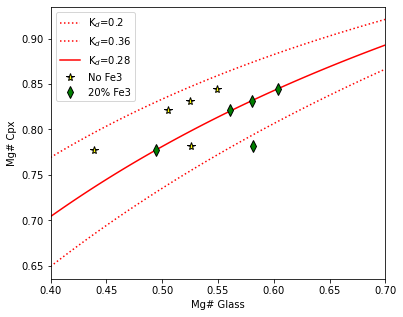

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.2)'], ':r', label="K$_d$=0.2")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.36)'], ':r', label="K$_d$=0.36")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Cpx_Mg# (Kd=0.28)'], '-r', label="K$_d$=0.28")
ax1.set_xlim([0.4, 0.7])
ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_CPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_CPX'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')

## Option 2- Using equation 35 of Putirka (where Kd is a function of T).
- Must specify T in Kelvin. Then return column for default 0.28, as well as the results for Putirka eq 35.

In [23]:
eq_lines_2=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, T=1300)
eq_lines_2.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Kd_Eq35_P2008,Eq_Cpx_Mg# (Kd from Eq 35 P2008),Eq_Cpx_Mg# (Eq 35 P2008)+0.08,Eq_Cpx_Mg# (Eq 35 P2008)-0.08
0,0.400000,0.704225,0.769231,0.649351,0.239475,0.735720,0.676036,0.806964
1,0.403030,0.706845,0.771462,0.652217,0.239475,0.738165,0.678791,0.808921
2,0.406061,0.709445,0.773672,0.655065,0.239475,0.740589,0.681528,0.810858
3,0.409091,0.712025,0.775862,0.657895,0.239475,0.742993,0.684246,0.812775
4,0.412121,0.714586,0.778032,0.660707,0.239475,0.745377,0.686945,0.814673


Text(0, 0.5, 'Mg# Cpx')

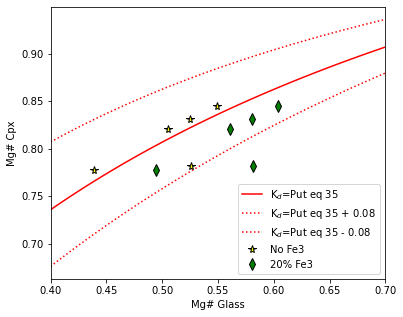

In [24]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Kd from Eq 35 P2008)'], '-r', label="K$_d$=Put eq 35")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Eq 35 P2008)+0.08'], ':r', label="K$_d$=Put eq 35 + 0.08")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Cpx_Mg# (Eq 35 P2008)-0.08'], ':r', label="K$_d$=Put eq 35 - 0.08")
ax1.set_xlim([0.4, 0.7])
ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_CPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_CPX'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')

## Option 3 - Specify a minimum and maximum Kd value you wish to calculate lines for

In [25]:
eq_lines_3=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, KdMin=0.2, KdMax=0.3)
eq_lines_3.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Eq_Cpx_Mg# (KdMin=0.2),Eq_Cpx_Mg# (KdMax=0.3)
0,0.400000,0.704225,0.769231,0.649351,0.769231,0.689655
1,0.403030,0.706845,0.771462,0.652217,0.771462,0.692348
2,0.406061,0.709445,0.773672,0.655065,0.773672,0.695021
3,0.409091,0.712025,0.775862,0.657895,0.775862,0.697674
4,0.412121,0.714586,0.778032,0.660707,0.778032,0.700309


Text(0, 0.5, 'Mg# Cpx')

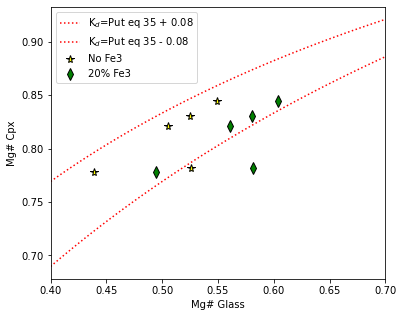

In [27]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMin=0.2)'], ':r', label="K$_d$=Put eq 35 + 0.08")
ax1.plot(eq_lines_3['Mg#_Liq'], eq_lines_3['Eq_Cpx_Mg# (KdMax=0.3)'], ':r', label="K$_d$=Put eq 35 - 0.08")
ax1.set_xlim([0.4, 0.7])
ax1.plot(cpx_comps_Fe3['Mgno_Liq_noFe3'], cpx_comps_Fe3['Mgno_CPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(cpx_comps_Fe3['Mgno_Liq_Fe2'], cpx_comps_Fe3['Mgno_CPX'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Cpx')

## Option 4 - Can get all options by specifying a temp, and a min and max Kd

In [27]:
eq_lines_4=pt.calculate_cpx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, T=1300, KdMin=0.2, KdMax=0.3)
eq_lines_4.head()

,Mg#_Liq,Eq_Cpx_Mg# (Kd=0.28),Eq_Cpx_Mg# (Kd=0.2),Eq_Cpx_Mg# (Kd=0.36),Kd_Eq35_P2008,Eq_Cpx_Mg# (Kd from Eq 35 P2008),Eq_Cpx_Mg# (Eq 35 P2008)+0.08,Eq_Cpx_Mg# (Eq 35 P2008)-0.08,Eq_Cpx_Mg# (KdMin=0.2),Eq_Cpx_Mg# (KdMax=0.3)
0,0.400000,0.704225,0.769231,0.649351,0.239475,0.735720,0.676036,0.806964,0.769231,0.689655
1,0.403030,0.706845,0.771462,0.652217,0.239475,0.738165,0.678791,0.808921,0.771462,0.692348
2,0.406061,0.709445,0.773672,0.655065,0.239475,0.740589,0.681528,0.810858,0.773672,0.695021
3,0.409091,0.712025,0.775862,0.657895,0.239475,0.742993,0.684246,0.812775,0.775862,0.697674
4,0.412121,0.714586,0.778032,0.660707,0.239475,0.745377,0.686945,0.814673,0.778032,0.700309
